190501V - Ranathunga R.A.C.D.

Question 01

In [2]:
#import the libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

%matplotlib inline

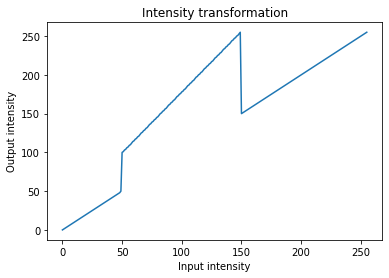

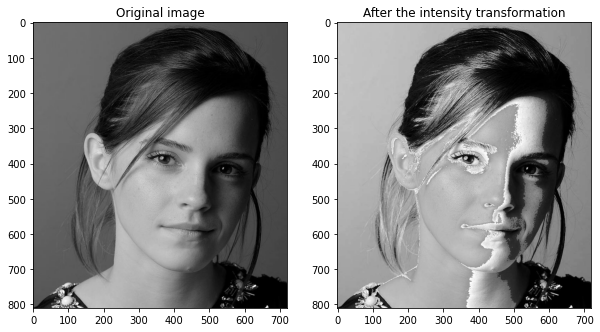

In [3]:
#read the image
original = cv.imread(r'emma_gray.jpg',cv.IMREAD_COLOR)
assert original is not None

#define the transformation
transf_1 = np.linspace(0,50,50)
transf_2 = np.linspace(100,255,100)
transf_3 = np.linspace(150,255,106)   

transform = np.concatenate((transf_1,transf_2,transf_3),axis = 0).astype(np.uint8)

#plot transform characteristics
fig,ax = plt.subplots()
ax.plot(transform)
ax.set_title("Intensity transformation")
ax.set_ylabel("Output intensity")
ax.set_xlabel("Input intensity")

#apply the transform
output = cv.LUT(original,transform)


#show the image using matplotlib
fig, ax = plt.subplots(1,2,figsize=(10,10))

output = cv.cvtColor(output,cv.COLOR_BGR2RGB)
ax[0].imshow(original)
ax[0].set_title("Original image")

ax[1].imshow(output)
ax[1].set_title("After the intensity transformation")

plt.show()


Question 02

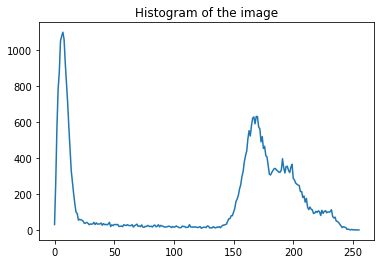

In [70]:
image = cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert image is not None

#I want to get an idea about the color gray level distribution by plotting the histogram
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
hist = cv.calcHist([image],[0],None,[256],[0,256])
plt.plot(hist)
plt.title("Histogram of the image")
plt.show()


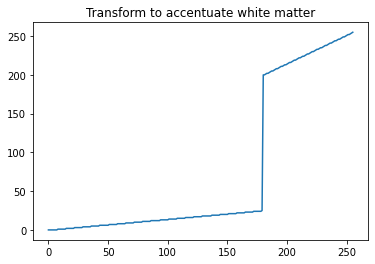

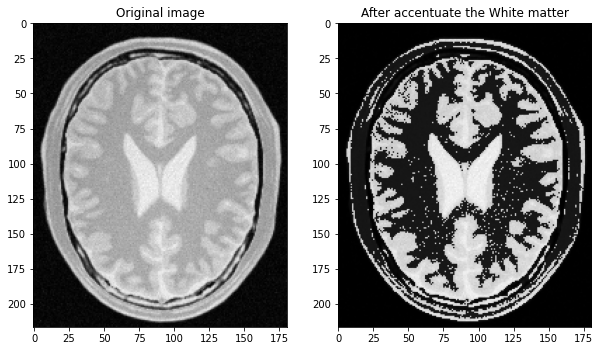

In [77]:
transf_1 = np.linspace(0,25,180)
transf_2 = np.linspace(200,255,76)
transform = np.concatenate((transf_1,transf_2),axis = 0).astype(np.uint8)
plt.plot(transform)
plt.title('Transform to accentuate white matter')
#This transform map the white matter to be close to further white while putting others down

output = cv.LUT(image,transform)

fig, ax = plt.subplots(1,2,figsize=(10,10))

output = cv.cvtColor(output,cv.COLOR_BGR2RGB)
ax[0].imshow(image)
ax[0].set_title("Original image")

ax[1].imshow(output)
ax[1].set_title("After accentuate the White matter")

plt.show()

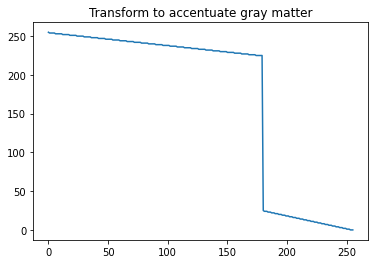

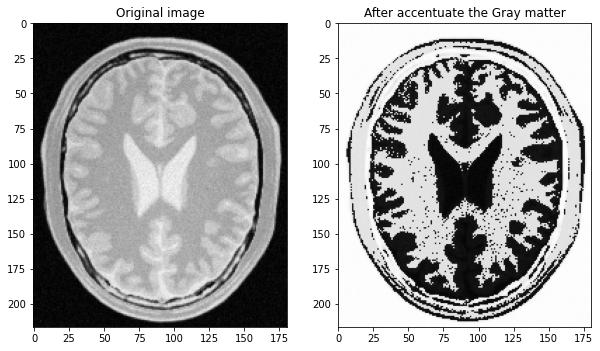

In [78]:
transf_1 = np.linspace(255,225,180)
transf_2 = np.linspace(25,0,76)
transform = np.concatenate((transf_1,transf_2),axis = 0).astype(np.uint8)
plt.plot(transform)
plt.title('Transform to accentuate gray matter')
#This transform map the gray matter to be close to white while putting others down


output = cv.LUT(image,transform)
output = cv.cvtColor(output,cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(image)
ax[0].set_title("Original image")

ax[1].imshow(output)
ax[1].set_title("After accentuate the Gray matter")

plt.show()

Question 03

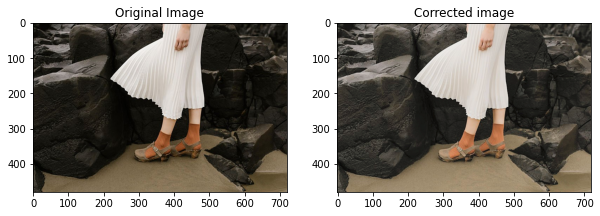

In [79]:
original_image = cv.imread("highlights_and_shadows.jpg", cv.IMREAD_COLOR)
assert original_image is not None

LAB_image = cv.cvtColor(original_image,cv.COLOR_BGR2LAB) #convert image to L*A*B space

gamma = 0.65

transform = np.array([(p/225)**gamma*225 for p in range(0,256)]).astype(np.uint8)  #gamma array

new_L = cv.LUT(LAB_image[:,:,0],transform)   #perform the transform to L plane
LAB_image[:,:,0] = new_L  #replace by new L plane
output = cv.cvtColor(LAB_image,cv.COLOR_LAB2RGB)  #convert image to RGB before show using matplotlib

fig,ax = plt.subplots(1,2,figsize =(10,10))
original_image = cv.cvtColor(original_image,cv.COLOR_BGR2RGB)

ax[0].imshow(original_image)
ax[0].set_title("Original Image")

ax[1].imshow(output)
ax[1].set_title("Corrected image")
plt.show()


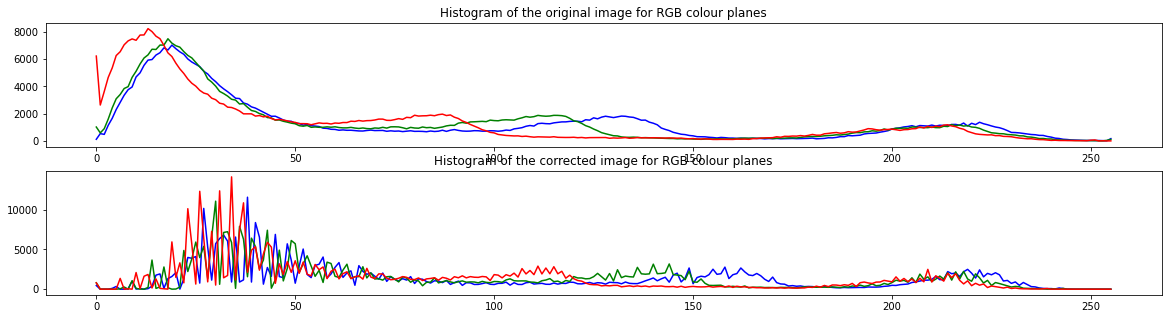

In [84]:
colours = ['b','g','r']  #represnts three colour planes
fig, ax = plt.subplots(2,1, figsize=(20,5))

for i,c in enumerate(colours):
    hist = cv.calcHist([original_image],[i],None,[256],[0,256])
    ax[0].plot(hist, color = c)
ax[0].set_title('Histogram of the original image for RGB colour planes')

for i,c in enumerate(colours):
    hist = cv.calcHist([output],[i],None,[256],[0,256])
    ax[1].plot(hist, color = c)
ax[1].set_title('Histogram of the corrected image for RGB colour planes')

plt.show()